# Montaña Rusa de la Era Digital 😎

<center><img src="Imagenes/meme1.jpeg" width="300px"></center>
<center><img src="Imagenes/meme2.gif" width="300px"></center>

In [1]:
using HTTP
using JSON
using DataFrames
using CSV

# Pido los datos a la API
url = "https://api.n2yo.com/rest/v1/satellite/tle/25544&apiKey=T58NBR-Q5NHQE-Y76PS5-59V1"
res = HTTP.get(url)
json = JSON.parse(String(res.body))
puntos_satelites = json["tle"]

#Saco los datos del los CSV
datos_1 = DataFrame(CSV.File("Puntos_1.csv"))
datos_2 = DataFrame(CSV.File("Puntos_2.csv"))
datos_3 = DataFrame(CSV.File("Puntos_3.csv"))

function Listador(data)
    matriz = []
    for fila in eachrow(data)
        # Convertir cada CSV.Row en un Vector de sus valores
        fila_vector = [valor for valor in fila]
        push!(matriz, fila_vector)
    end
    return matriz
end

#Datos para el paso 1
matriz_1 = Listador(datos_1) # Cambiado a datos_3 para coincidir con el archivo activo
#Datos para el paso 2
matriz_2 = Listador(datos_2)
#Datos para el paso 4
matriz_3 = Listador(datos_3)


#Datos para el paso 1
xi_1 = matriz_1[1]
yi_1 = matriz_1[2]
linespace = matriz_1[3]
linespace_1 = linespace[1:end-3]

#Datos para el paso 2
xi_2 = matriz_2[1]
yi_2 = matriz_2[2]
linespace = matriz_2[3]
linespace_2 = linespace[1:end-2]


print("Datos obtenidos de forma correcta")

Datos obtenidos de forma correcta

# Paso 1: Método de Trazador Cúbico Sujeto

Polinomios por tramos: 
 x = [0.0, 1.0]
0.00622009569377987*x^3 + 0.29377990430622*x + 0.5
 x = [1.0, 2.0]
-0.131100478468899*x^3 + 0.411961722488038*x^2 - 0.118181818181818*x + 0.637320574162679
 x = [2.0, 3.0]
0.318181818181818*x^3 - 2.28373205741627*x^2 + 5.27320574162679*x - 2.95693779904306
 x = [3.0, 4.0]
-0.441626794258373*x^3 + 4.55454545454545*x^2 - 15.2416267942584*x + 17.5578947368421
 x = [4.0, 5.0]
0.248325358851675*x^3 - 3.72488038277512*x^2 + 17.8760765550239*x - 26.599043062201


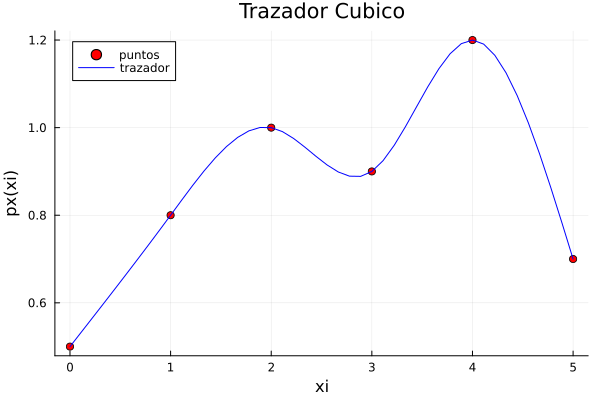

In [123]:
using LinearAlgebra
using SymPy
using Plots
using PyCall

function TrazadorCubico(xi, yi)
    n = length(xi)
    
    #Creando el Valor h
    h = zeros(Float64, n-1)
    for j in 1:n-1
        h[j] = xi[j+1] - xi[j]
    end
    
    # Sistema de Ecuaciones
    A = zeros(Float64, n-2, n-2)
    B = zeros(Float64, n-2)
    S = zeros(Float64, n)
    
    A[1,1] = 2 * (h[1] + h[2])
    A[1,2] = h[2]
    B[1] = 6 * ((yi[3] - yi[2]) / h[2] - (yi[2] - yi[1]) / h[1])
    
    for i in 2:n-3
        A[i,i-1] = h[i]
        A[i,i] = 2 * (h[i] + h[i+1])
        A[i,i+1] = h[i+1]
        factor21 = (yi[i+2] - yi[i+1]) / h[i+1]
        factor10 = (yi[i+1] - yi[i]) / h[i]
        B[i] = 6 * (factor21 - factor10)
    end
    
    A[n-2,n-3] = h[n-2]
    A[n-2,n-2] = 2 * (h[n-2] + h[n-1])
    factor12 = (yi[n] - yi[n-1]) / h[n-1]
    factor23 = (yi[n-1] - yi[n-2]) / h[n-2]
    B[n-2] = 6 * (factor12 - factor23)
    
    # Solve the system of equations S
    r = A \ B
    for j in 2:n-1
        S[j] = r[j-1]
    end
    S[1] = 0
    S[n] = 0
    
    # Coeficientes bien pros
    a = zeros(Float64, n-1)
    b = zeros(Float64, n-1)
    c = zeros(Float64, n-1)
    d = zeros(Float64, n-1)
    for j in 1:n-1
        a[j] = (S[j+1] - S[j]) / (6 * h[j])
        b[j] = S[j] / 2
        factor10 = (yi[j+1] - yi[j]) / h[j]
        c[j] = factor10 - (2 * h[j] * S[j] + h[j] * S[j+1]) / 6
        d[j] = yi[j]
    end
    
    # Enviando el polinomio
    x = symbols("x")
    px_tabla = []
    for j in 1:n-1
        pxtramo = a[j] * (x - xi[j])^3 + b[j] * (x - xi[j])^2
        pxtramo += c[j] * (x - xi[j]) + d[j]
        pxtramo = expand(pxtramo)
        push!(px_tabla, pxtramo)
    end
    
    return px_tabla
end
muestras = 10 
n = length(xi_1)
px_tabla = TrazadorCubico(xi_1, yi_1)

println("Polinomios por tramos: ")
for tramo in 1:n-1
    println(" x = [$(xi[tramo]), $(xi[tramo+1])]")
    println("$(px_tabla[tramo])")
end


x = symbols("x")
xtraza = Float64[]
ytraza = Float64[]
for tramo in 1:n-1
    a = xi_1[tramo]
    b = xi_1[tramo+1]
    xtramo = range(a, stop=b, length=muestras)
    
    # evalua polinomio del tramo
    pxtramo = px_tabla[tramo]
    pxt = lambdify(pxtramo, [x])
    ytramo = pxt.(xtramo)

    # vectores de trazador en x,y
    append!(xtraza, xtramo)
    append!(ytraza, ytramo)
end

# Gráfica
scatter(xi_1, yi_1, label="puntos", color=:red)
plot!(xtraza, ytraza, label="trazador", color=:blue)
title!("Trazador Cubico")
xlabel!("xi")
ylabel!("px(xi)")
    

## Paso 2: Polinomio de Mínimos Cuadrados

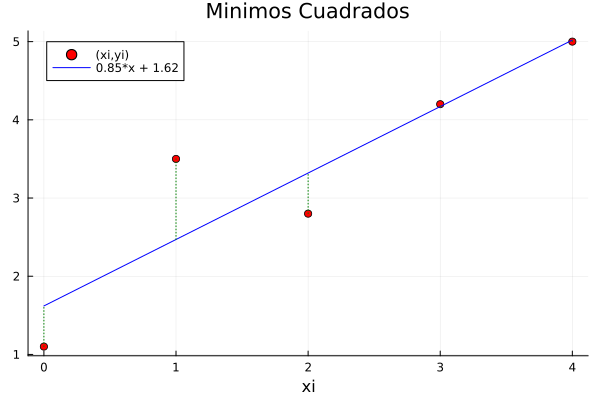

 f = 0.85*x + 1.62
coef_correlación   r  = 0.9046649478535933
coef_determinación r2 = 0.8184186678749447
81.84% de los datos está descrito en el modelo lineal


In [11]:
using Plots
using Statistics
using SymPy

n = length(xi_2)

xm = mean(xi_2)
ym = mean(yi_2)
sx = sum(xi_2)
sy = sum(yi_2)
sxy = sum(xi_2 .* yi_2)
sx2 = sum(xi_2 .^ 2)
sy2 = sum(yi_2 .^ 2)


a1 = (n * sxy - sx * sy) / (n * sx2 - sx^2)
a0 = ym - a1 * xm

# polinomio grado 1
x = Sym("x")
f = a0 + a1 * x

fx = lambdify(f, [x])

fi = fx.(xi_2)

# coeficiente de correlación
numerador = n * sxy - sx * sy
raiz1 = sqrt(n * sx2 - sx^2)
raiz2 = sqrt(n * sy2 - sy^2)
r = numerador / (raiz1 * raiz2)

# coeficiente de determinacion
r2 = r^2
r2_porcentaje = round(r2 * 100, digits=2)

# SALIDA
println(" f = ", f)
println("coef_correlación   r  = ", r)
println("coef_determinación r2 = ", r2)
println(r2_porcentaje, "% de los datos está descrito en el modelo lineal")

# grafica
scatter(xi_2, yi_2, label="(xi,yi)", color=:red)
plot!(xi_2, fi, color=:blue, label=f, legend=:topleft)

# lineas de error
for i in 1:n
    y0 = min(yi_2[i], fi[i])
    y1 = max(yi_2[i], fi[i])
    plot!([xi_2[i], xi_2[i]], [y0, y1], color=:green, linestyle=:dot, label="")
end

xlabel!("xi")
title!("Minimos Cuadrados")
display(plot!())